In [138]:
#importing all modeuls and library which will be used in this notebook
import os
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img


import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
print("Setup Done!")

Setup Done!


In [151]:
PARENT_DIR = '/Users/shuangtian/ML interview test/bed_chair_sofa'
bed_child_dir = os.path.join(PARENT_DIR,'Bed')
chair_child_dir = os.path.join(PARENT_DIR,'Chair')
sofa_child_dir = os.path.join(PARENT_DIR,'Sofa')
os.listdir(PARENT_DIR)

['Bed', '.DS_Store', 'Chair', 'Sofa', 'Test ']

In [144]:
bed_loaded_img = os.listdir(bed_child_dir)
chair_loaded_img = os.listdir(chair_child_dir)
sofa_loaded_img = os.listdir(sofa_child_dir)


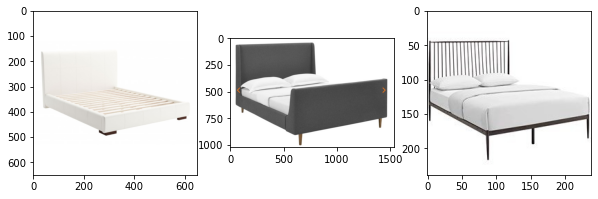

In [130]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(bed_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(bed_child_dir, img_path))
    plt.imshow(img)
plt.show()

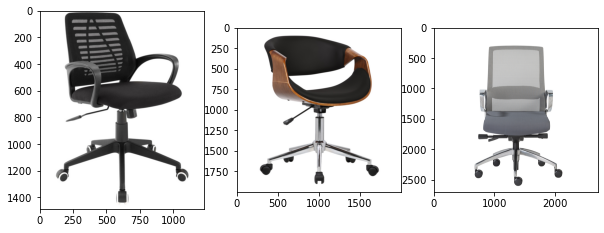

In [95]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(chair_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(chair_child_dir, img_path))
    plt.imshow(img)
plt.show()

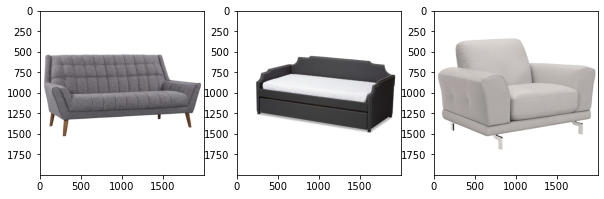

In [96]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(sofa_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(sofa_child_dir, img_path))
    plt.imshow(img)
plt.show()

# Loading data from directory using `ImageDataGenerator` available in tensorflow API


In [160]:
#main_dir='/Users/shuangtian/ML interview test/papar_rock_scissors' # local driver
main_dir='/Users/shuangtian/ML interview test/bed_chair_sofa' # local driver and change to bed_chair_sofa
train_data = ImageDataGenerator( rescale = 1.0/255,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='reflect',
                                           validation_split=0.2,
                                  )


train_generator = train_data.flow_from_directory(main_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                   subset='training')

validation_data = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.2)


validation_generator = validation_data.flow_from_directory(main_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                    subset='validation')





print("Done!")

Found 244 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Done!


# Building model using keras Sequential API

* The Sequential API is a way to create a neural network model in Keras, a popular deep learning library. It allows you to build a model layer by layer, in a linear fashion, by specifying the input layer and the output layer, and then adding any number of hidden layers in between


* Learn more about Sequential click below link:
[Sequential API](https://faroit.com/keras-docs/1.1.0/models/sequential/)

In [170]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(60, 40, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 56, 36, 64)        4864      
                                                                 
 batch_normalization_10 (Bat  (None, 56, 36, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 56, 36, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 18, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 9, 128)     

Learning rate reduction is a method used in machine learning to decrease the learning rate over time during training. This is typically done to help improve the accuracy of the model and prevent overfitting. The learning rate determines how fast the model is learning, and a reduction in the learning rate allows the model to make more refined and accurate predictions. There are several methods for reducing the learning rate, such as reducing the learning rate by a fixed amount after a certain number of epochs or using a learning rate scheduler that adjusts the learning rate based on the performance of the model.

In [174]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [176]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

history = model.fit(train_generator,
                    epochs = 50,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

"model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])\n\nhistory = model.fit(train_generator,\n                    epochs = 50,\n                    verbose = 1,\n                   validation_data = validation_generator,\n                   callbacks=[learning_rate_reduction])"

# Ploting training and validation accuracy
# Plotting training and validation loss

In [ ]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

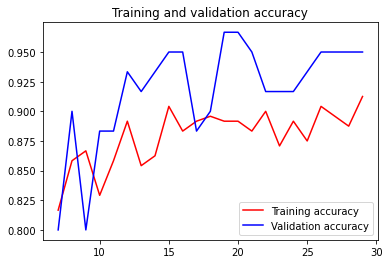

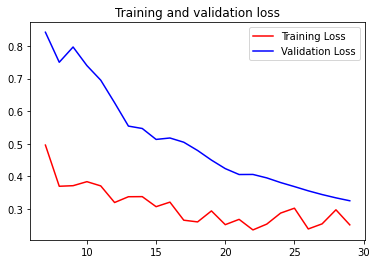

In [72]:
%matplotlib inline
acc = history.history['acc'][7:]
val_acc = history.history['val_acc'][7:]
loss = history.history['loss'][7:]
val_loss = history.history['val_loss'][7:]

epochs = range(7,7+len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predict images!

1/1 [==============================] - 0s 24ms/step
Chair


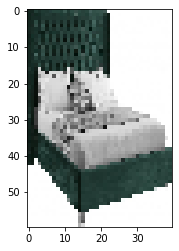

In [157]:
uploaded = os.path.join(bed_child_dir,'Aiden Velvet Bed.jpg') # the path must convert to 
img = image.load_img(uploaded, target_size = (60,40))
 
#path=test_child_dir
#for img in test_child_dir:
#img=image.load_img(path+"/"+img,target_size=(60,40))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes=model.predict(images,batch_size=1) 

if classes[0][0]>0.5:
  print('Bed')
elif classes[0][1]> 0.5:
  print('Chair')
elif classes[0][2]> 0.5:
  print('Sofa')
else:
  print('Unknown')

In [105]:
model.save("bed_chair_sofa.h5")

## Buid a API to access the Model

In [182]:
from flask import Flask, request, jsonify
from PIL import Image
import numpy as np
import tensorflow as tf

app = Flask(__name__)

model = tf.keras.models.load_model('bed_chair_sofa.h5')

@app.route('/predict', methods=['POST'])

def predict():
    # Get the image file from the request
    image_file = request.files['image']

    # Load the image using Pillow
    image = Image.open(image_file)

    # Preprocess the image
    image = image.resize((60,40))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Make the prediction
    prediction = model.predict(image)[0]
    label = np.argmax(prediction)

    # Return the predicted label as JSON
    return jsonify({'label': int(label)})

if __name__ == '__main__':
    app.run(debug=True)


## Implement CI/CD pipeline on Github Actions.
